In [1]:
# 사용할 라이브러리 불러오기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Python 버전 확인
# 가능하면 Python 3를 사용하는 게 좋습니다.

import sys

sys.version

'2.7.12 (default, Jan  4 2017, 21:04:22) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]'

In [3]:
# Python 2에서 Python 3 기능 사용

from __future__ import print_function

In [4]:
# TensorFlow 버전 확인
# 최신 버전은 1.3.0이지만 실습 환경은 1.1.0으로 구성되어 있습니다.

tf.__version__

'1.1.0'

In [5]:
# MNIST 데이터 로딩

import numpy as np

with open('data/train-images-idx3-ubyte', 'rb') as f:
    x_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255.0

with open('data/train-labels-idx1-ubyte', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)

with open('data/t10k-images-idx3-ubyte', 'rb') as f:
    x_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255.0

with open('data/t10k-labels-idx1-ubyte', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

In [6]:
# 훈련 데이터 확인

x_train.shape, y_train.shape

((60000, 784), (60000,))

In [7]:
# 테스트 데이터 확인

x_test.shape, y_test.shape

((10000, 784), (10000,))

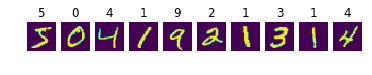

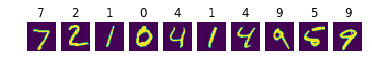

In [8]:
# 손글씨 이미지 시각화

def draw_image(images, labels):
    fig, axes = plt.subplots(1, images.shape[0])
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28, 28))
        ax.set_title(labels[i])
    plt.show()

draw_image(x_train[:10], y_train[:10])

draw_image(x_test[:10], y_test[:10])

In [9]:
# 훈련 데이터 배치로 분할

batch_size = 1000

sample_size = x_train.shape[0]
batch_range = range(0, sample_size, batch_size)

x_batches = [x_train[i:i + batch_size] for i in batch_range]
y_batches = [y_train[i:i + batch_size] for i in batch_range]

In [10]:
# 신경망 모델 생성

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

u = tf.layers.dense(x, 10)
z = tf.nn.softmax(u)

In [11]:
# 비용-최적화

loss = tf.nn.softmax_cross_entropy_with_logits(
    logits=u, # softmax 적용 전!
    labels=tf.one_hot(y, 10) # one-hot encoding
)

learning_rate = 0.0001
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [12]:
# 예측 및 정확도

predict = tf.argmax(z, axis=1)

correct = tf.equal(y, predict)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [13]:
# TensorFlow 세션 준비

session = tf.Session()
session.run(tf.global_variables_initializer())

In [14]:
# 반복

num_epoch = 10

test_feed = {
    x: x_test,
    y: y_test
}

for i in range(num_epoch):
    print('Epoch #{}/{}'.format(i + 1, num_epoch))

    # 훈련
    for x_data, y_data in zip(x_batches, y_batches):
        train_feed = {
            x: x_data,
            y: y_data
        }
        session.run(train, feed_dict=train_feed)
        print('.', end='')
    print()

    # 정확도
    test_accuracy = session.run(accuracy, feed_dict=test_feed)
    print('Test Accuracy: {}'.format(test_accuracy))
    print()

print('Done!')

Epoch #1/10
............................................................
Test Accuracy: 0.26060000062

Epoch #2/10
............................................................
Test Accuracy: 0.462999999523

Epoch #3/10
............................................................
Test Accuracy: 0.608900010586

Epoch #4/10
............................................................
Test Accuracy: 0.679499983788

Epoch #5/10
............................................................
Test Accuracy: 0.721199989319

Epoch #6/10
............................................................
Test Accuracy: 0.750899970531

Epoch #7/10
............................................................
Test Accuracy: 0.77270001173

Epoch #8/10
............................................................
Test Accuracy: 0.787400007248

Epoch #9/10
............................................................
Test Accuracy: 0.800300002098

Epoch #10/10
.....................................................

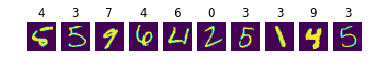

In [15]:
# 오답 시각화

p, c = session.run([predict, correct], feed_dict=test_feed)

images = x_test[~c]
labels = p[~c]

draw_image(images[:10], labels[:10])

In [16]:
# CNN 모델 생성

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

x_2d = tf.reshape(x, [-1, 28, 28, 1])

print(x_2d.shape)

# 1단계

c1 = tf.contrib.layers.conv2d(x_2d, 4, [5, 5])
p1 = tf.contrib.layers.max_pool2d(c1, [2, 2])

print(p1.shape)

# 2단계

c2 = tf.contrib.layers.conv2d(p1, 8, [5, 5])
p2 = tf.contrib.layers.max_pool2d(c2, [2, 2])

print(p2.shape)

# Fully Connected

flat = tf.contrib.layers.flatten(p2)

print(flat.shape)

fc = tf.contrib.layers.fully_connected(flat, 200)

print(fc.shape)

drop = tf.nn.dropout(fc, keep_prob)

u = tf.layers.dense(drop, 10)
z = tf.nn.softmax(u)

print(z.shape)

(?, 28, 28, 1)
(?, 14, 14, 4)
(?, 7, 7, 8)
(?, 392)
(?, 200)
(?, 10)


In [17]:
# 비용-최적화

loss = tf.nn.softmax_cross_entropy_with_logits(
    logits=u, # softmax 적용 전!
    labels=tf.one_hot(y, 10) # one-hot encoding
)

learning_rate = 0.0001
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [18]:
# 예측 및 정확도

predict = tf.argmax(z, axis=1)

correct = tf.equal(y, predict)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [19]:
# TensorFlow 세션 준비

session = tf.Session()
session.run(tf.global_variables_initializer())

In [20]:
# 반복

num_epoch = 10

test_feed = {
    x: x_test,
    y: y_test,
    keep_prob: 1.0
}

for i in range(num_epoch):
    print('Epoch #{}/{}'.format(i + 1, num_epoch))

    # 훈련
    for x_data, y_data in zip(x_batches, y_batches):
        train_feed = {
            x: x_data,
            y: y_data,
            keep_prob: 0.5
        }
        session.run(train, feed_dict=train_feed)
        print('.', end='')
    print()

    # 정확도
    test_accuracy = session.run(accuracy, feed_dict=test_feed)
    print('Test Accuracy: {}'.format(test_accuracy))
    print()

print('Done!')

Epoch #1/10
............................................................
Test Accuracy: 0.598299980164

Epoch #2/10
............................................................
Test Accuracy: 0.767599999905

Epoch #3/10
............................................................
Test Accuracy: 0.832300007343

Epoch #4/10
............................................................
Test Accuracy: 0.865899980068

Epoch #5/10
............................................................
Test Accuracy: 0.885800004005

Epoch #6/10
............................................................
Test Accuracy: 0.900200009346

Epoch #7/10
............................................................
Test Accuracy: 0.910499989986

Epoch #8/10
............................................................
Test Accuracy: 0.919200003147

Epoch #9/10
............................................................
Test Accuracy: 0.923500001431

Epoch #10/10
...................................................

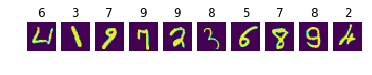

In [21]:
# 오답 시각화

p, c = session.run([predict, correct], feed_dict=test_feed)

images = x_test[~c]
labels = p[~c]

draw_image(images[:10], labels[:10])

In [22]:
# RNN 모델 생성

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 14 * 28])
y = tf.placeholder(tf.float32, [None, 14 * 28])

inputs = tf.reshape(x, [-1, 14, 28])

print(inputs.shape)

# TensorFlow 1.2부터 지원하는 dynamic_rnn을 쓰시는 게 더 낫습니다.
# https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/nn/dynamic_rnn

cell = tf.contrib.rnn.BasicLSTMCell(200)
outputs, states = tf.contrib.rnn.static_rnn(
    cell,
    tf.unstack(inputs, axis=1), # Python 리스트로 변환
    dtype=tf.float32
)

print(outputs[0].shape)

# Fully Connected

output = tf.concat(outputs, axis=1)

print(output.shape)

fc = tf.contrib.layers.fully_connected(output, 200)

print(fc.shape)

u = tf.layers.dense(output, 14 * 28)
z = tf.nn.sigmoid(u)

print(z.shape)

(?, 14, 28)
(?, 200)
(?, 2800)
(?, 200)
(?, 392)


In [23]:
# 비용-최적화

loss = tf.nn.sigmoid_cross_entropy_with_logits(
    logits=u, # softmax 적용 전!
    labels=y
)

learning_rate = 0.0001
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [24]:
# TensorFlow 세션 준비

session = tf.Session()
session.run(tf.global_variables_initializer())

In [25]:
# 반복

num_epoch = 5

for i in range(num_epoch):
    print('Epoch #{}/{}'.format(i + 1, num_epoch))

    # 훈련
    for x_data in x_batches:
        train_feed = {
            x: x_data[:, :14 * 28],
            y: x_data[:, 14 * 28:]
        }
        session.run(train, feed_dict=train_feed)
        print('.', end='')
    print()

print('Done!')

Epoch #1/5
............................................................
Epoch #2/5
............................................................
Epoch #3/5
............................................................
Epoch #4/5
............................................................
Epoch #5/5
............................................................
Done!


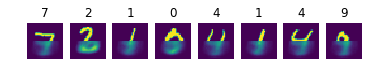

In [26]:
# 예측 및 시각화

count = 8

images1 = x_test[:count, :14 * 28]
images2 = session.run(z, feed_dict={
    x: images1
})

images = np.concatenate([images1, images2], axis=1)

draw_image(images, y_test[:count])